In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Estimated Salary wd be our continous output variable
# Rest all input
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [5]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.Gender.value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [7]:
enc = OneHotEncoder(drop = 'first', sparse_output=True)
encoded_vals = enc.fit_transform(df[['Geography']])
encoded_vals

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4986 stored elements and shape (10000, 2)>

In [8]:
enc = OneHotEncoder(drop = 'first', sparse_output=False)
encoded_vals = enc.fit_transform(df[['Geography']]).astype(int)
encoded_vals

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [1, 0],
       [0, 0]])

In [9]:
df_encoded = pd.DataFrame(encoded_vals, columns = enc.get_feature_names_out(['Geography']))
df_encoded.head()

,Geography_Germany,Geography_Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [10]:
df = pd.concat([df, df_encoded], axis = 1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [12]:
df.drop(columns = ["Geography"], inplace = True)

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [14]:
X = df.drop('EstimatedSalary', axis = 1)
y = df.EstimatedSalary

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
# Scaling always to be done after splitting else data leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ANN Regression Problem Statement

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# Build the model
model = Sequential()

model.add(Dense(64, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))  # Default activation = Linear Activation


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mae'])

In [21]:
import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_dir = 'regressionlogs/fit/' + datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)


In [22]:
# Train the model
history = model.fit(
    X_train, y_train,                # Training data
    epochs=100,                      # Maximum number of epochs
    # batch_size=32,                   # Batch size
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[early_stopping_callback, tensorboard_callback]  # Early stopping and TensorBoard callbacks
)

Epoch 1/100


250/250 [==============================] - 2s 3ms/step - loss: 100326.4766 - mae: 100326.4766 - val_loss: 98326.2656 - val_mae: 98326.2656
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 98926.0391 - mae: 98926.0391 - val_loss: 95543.7734 - val_mae: 95543.7734
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 94128.4297 - mae: 94128.4297 - val_loss: 88686.8984 - val_mae: 88686.8984
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 85238.9297 - mae: 85238.9297 - val_loss: 78243.6094 - val_mae: 78243.6094
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 73816.1328 - mae: 73816.1328 - val_loss: 66929.4297 - val_mae: 66929.4297
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 63224.8125 - mae: 63224.8125 - val_loss: 57944.7695 - val_mae: 57944.7695
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 55967.8750 - mae: 55967.875

In [23]:
%load_ext tensorboard

In [24]:
%tensorboard --logdir regressionlogs/fit

Reusing TensorBoard on port 6007 (pid 24988), started 13:00:25 ago. (Use '!kill 24988' to kill it.)

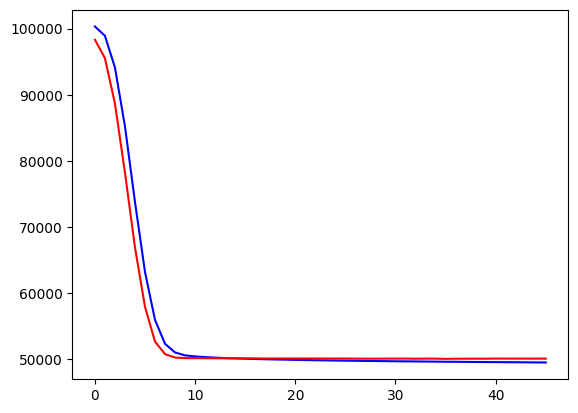

In [25]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from the history object
train_acc = history.history['loss']
val_acc = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(train_acc, color='blue')
plt.plot(val_acc, color='red')
plt.show()

In [26]:
model.save('')

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


In [27]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE : {test_mae}')

63/63 [==============================] - 0s 1ms/step - loss: 50090.8672 - mae: 50090.8672
Test MAE : 50090.8671875


In [28]:
model.save("regression_model.h5")

c:\Users\arsha\Downloads\Deep Learning\ANN_Classification\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
import pickle
with open('onehot_encoder_geo_reg.pkl', 'wb') as file:
    pickle.dump(enc, file)

with open('label_encoder_gender_reg.pkl', 'wb') as file:
    pickle.dump(le, file)    

with open('scaler_reg.pkl', 'wb') as file:
    pickle.dump(scaler, file)